## TEXT FILE (.txt)

In [1]:
text = 'Hello World'

# plus sign indicates both read and write for Python create file operation
f=open('sample.txt','w+')
f

<_io.TextIOWrapper name='sample.txt' mode='w+' encoding='UTF-8'>

In [2]:
f.write('Hello World')
f.close()

In [3]:
# 'r' is the default mode
f=open('sample.txt')
f

<_io.TextIOWrapper name='sample.txt' mode='r' encoding='UTF-8'>

In [4]:
f.read()

'Hello World'

## JSON FILE (.json)

### Effective dump for dictionaries

In [5]:
# making a dictionary
years=['2019','2020','2021']
months=['Jan','Feb','Mar']

report={}

for year in years:
    report[year]={}
    
    for i, month in enumerate(months):
        report[year][month]=str(100*(i+1))
        
report

{'2019': {'Jan': '100', 'Feb': '200', 'Mar': '300'},
 '2020': {'Jan': '100', 'Feb': '200', 'Mar': '300'},
 '2021': {'Jan': '100', 'Feb': '200', 'Mar': '300'}}

In [6]:
import json

# writing JSON file
with open('sample.json','w') as f:
    json.dump(report, f, indent=4)

# reading JSON file
with open('sample.json') as f:
    report = json.load(f)
    
report

{'2019': {'Jan': '100', 'Feb': '200', 'Mar': '300'},
 '2020': {'Jan': '100', 'Feb': '200', 'Mar': '300'},
 '2021': {'Jan': '100', 'Feb': '200', 'Mar': '300'}}

## IMAGE FILE (.png/.jpeg/.jpg)

### Matplotlib

In [7]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4,5],[1,2,3,4,5])
plt.savefig('sample.png')

### Opencv

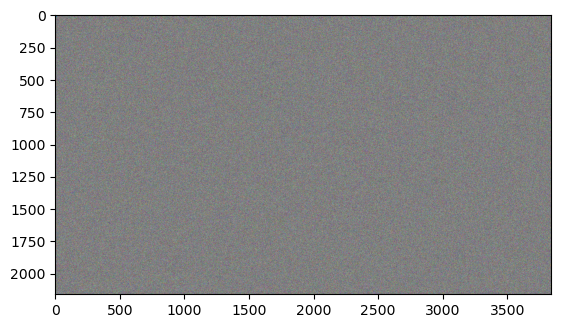

In [8]:
import cv2
import numpy as np

# creating a random image
height = 2160
width = 3840
img = np.random.uniform(0, 1, size = (height, width, 3))

plt.imshow(img)
plt.show()

# saving images
cv2.imwrite('sample.png', img)

# loading images
img = cv2.imread('sample.png')

### Imageio

In [9]:
import imageio

# saving image
imageio.imwrite('sample.png',img)

# loading image
img = imageio.imread('sample.png')

## HDFS (Hadoop Distributed File System) (.h5)

In [ ]:
import pandas as pd
df = pd.DataFrame(np.random.random(100).reshape(-1,2), columns=['X1','X2'])

# saving HDFS file, 'data' is the key name
df.to_hdf('sample.h5','data')

# loading HDFS file
data_hdfs = pd.HDFStore('sample.h5')

# use the same key to get back dataframe
df = data_hdfs['data']
data_hdfs.close()

## Parquet file (.parquet)

In [ ]:
# saving parquet file
df.to_parquet('sample.parquet',engine='pyarrow')

# loading parquet file
df = pd.read_parquet('sample.parquet')

## Numpy Array (.NPY)

In [ ]:
# making an array
arr = np.random.randint(0,1,100000)

# saving numpy arrays
np.save('sample.npy',arr)

# loading numpy arrays
import pickle
arr = np.load('sample.npy',allow_pickle=True)

## Pickling a list (.pickle)

In [ ]:
data = list(range(100000))

# saving pickle file
with open ('sample.pkl','wb') as f:
    pickle.dump(data, f)

# loading pickle file
with open('sample.pkl','rb') as f:
    data = pickle.load(f)

## Amazon S3 (Simple Storage Service)

In [ ]:
import boto3
from tqdm import tqdm

bucketname = 'bucket_name'
s3 = boto3.resource('s3')

# upload files to S3
s3.Bucket(bucketname).upload_file('input.csv','output.csv')


# download files from S3
# sample
for idx in tqdm(object_idx, total=len(object_idx)):
    filename = f'{idx}.csv'
    s3.Bucket(bucketname).download_file(filename,f'data/{idx}.csv')


# getting filenames in S3 directory
# directory path
prefix='path'
filenames=[]

for files in s3.Bucket(bucketname).objects.filter(Prefix=prefix).all():
    filenames.append(files.key)    

## AWS Wrangler

In [ ]:
# uploading data to S3 bucket for usage in EMR
# parquet format

import awswrangler as wr

SIZE = 1000000

for idx in tqdm(range(0,int(len(df) / SIZE)+1)):
    iter_df = df[idx*SIZE:min((idx+1)*SIZE, len(df))]
    
    wr.s3.to_parquet(
        df=iter_df,
        path=f's3://s3-bucket/part_{idx}.parquet'
    )